In [65]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE

In [66]:
df = pd.read_csv('Base.csv')

In [67]:
df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [69]:
len(df)# 数据的数量 

1000000

In [70]:
class_count = df['fraud_bool'].value_counts()
print(class_count)

fraud_bool
0    988971
1     11029
Name: count, dtype: int64


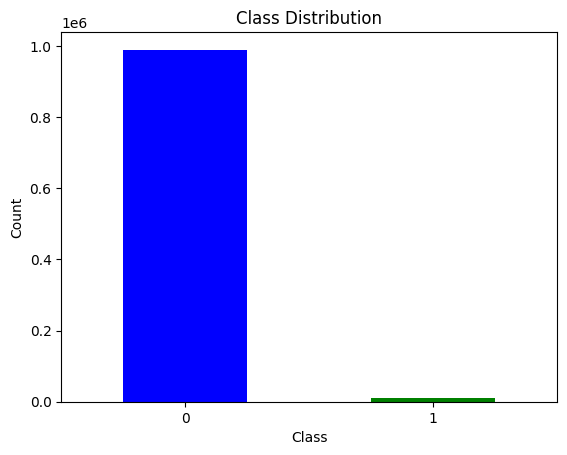

In [71]:
class_count.plot(kind='bar', color=['blue', 'green'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [72]:
df_encoded = pd.get_dummies(df, columns=['payment_type', 'employment_status', 'housing_status','source','device_os'])
df_encoded.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,False,False,False,True,False,True,False,False,False,False
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,False,False,False,True,False,False,False,True,False,False
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,False,False,False,True,False,False,False,False,True,False
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,False,False,False,True,False,True,False,False,False,False
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,False,False,False,True,False,False,False,True,False,False


In [73]:
df = df.drop(['payment_type', 'employment_status', 'housing_status','source','device_os'], axis=1)#删除非数字特征
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,1,9,0,1500.0,0,16.224843,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,1,2,0,1500.0,0,3.363854,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,1,30,0,200.0,0,22.730559,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,1,1,0,200.0,0,15.215816,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,1,26,0,200.0,0,3.743048,0,1,0,0


C:\Users\RAPHAEL\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


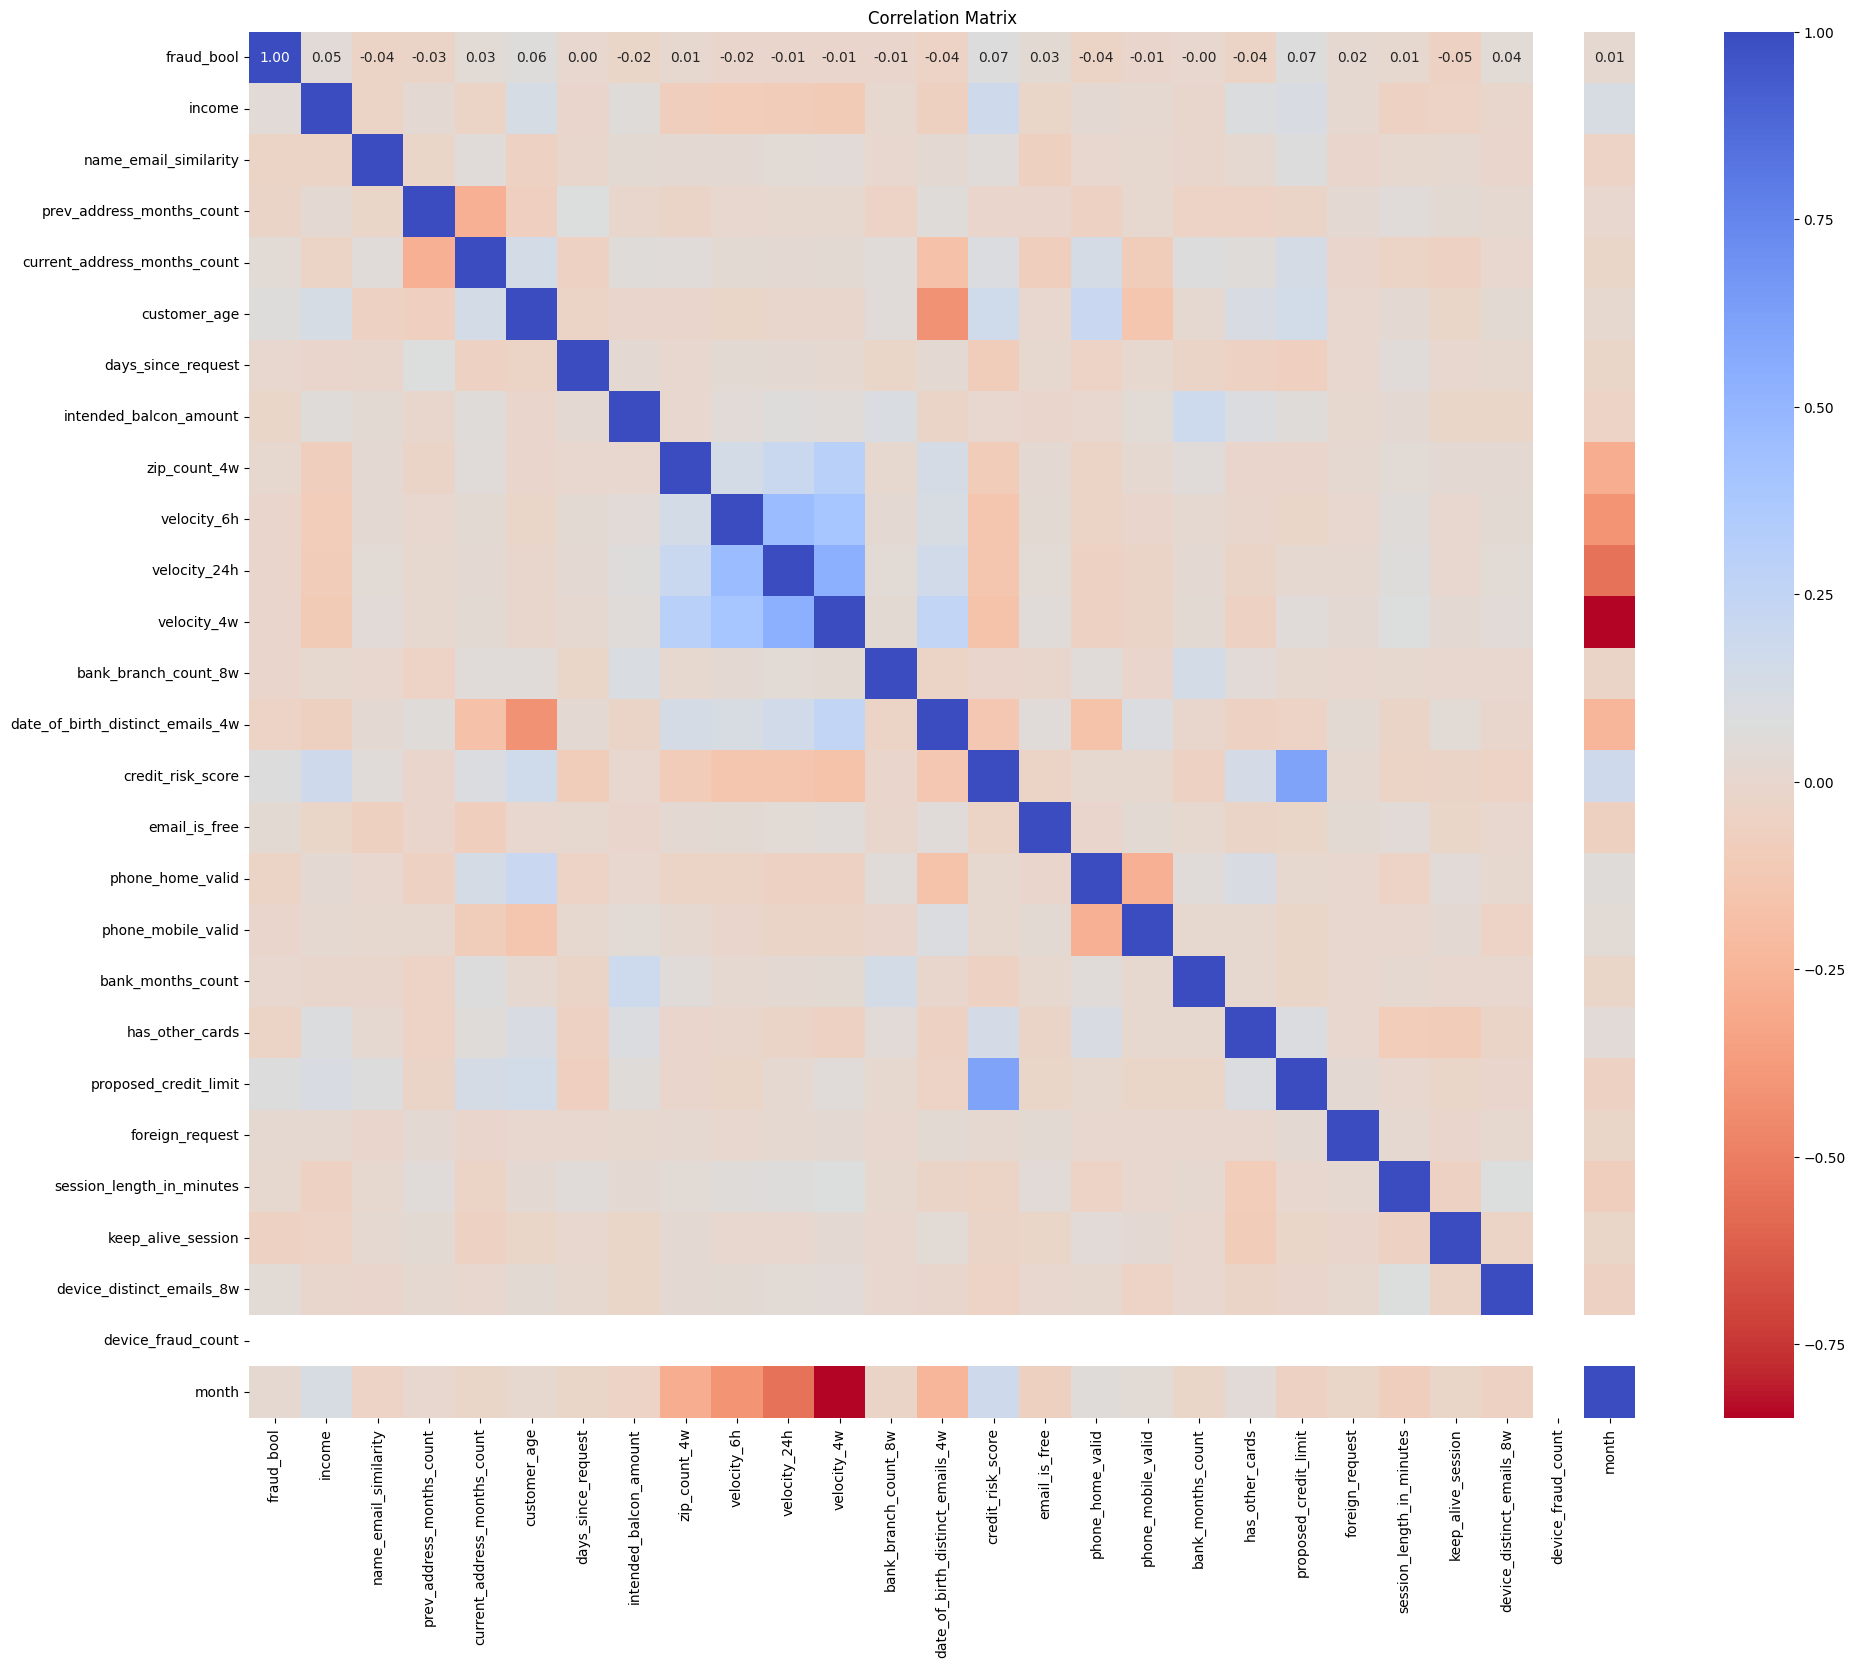

In [74]:
plt.figure(figsize=(23,18))
correlation_matrix = df.corr()
last_row = correlation_matrix.iloc[-1]
sns.heatmap(correlation_matrix, vmax=1, square=True, cmap="coolwarm_r",annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

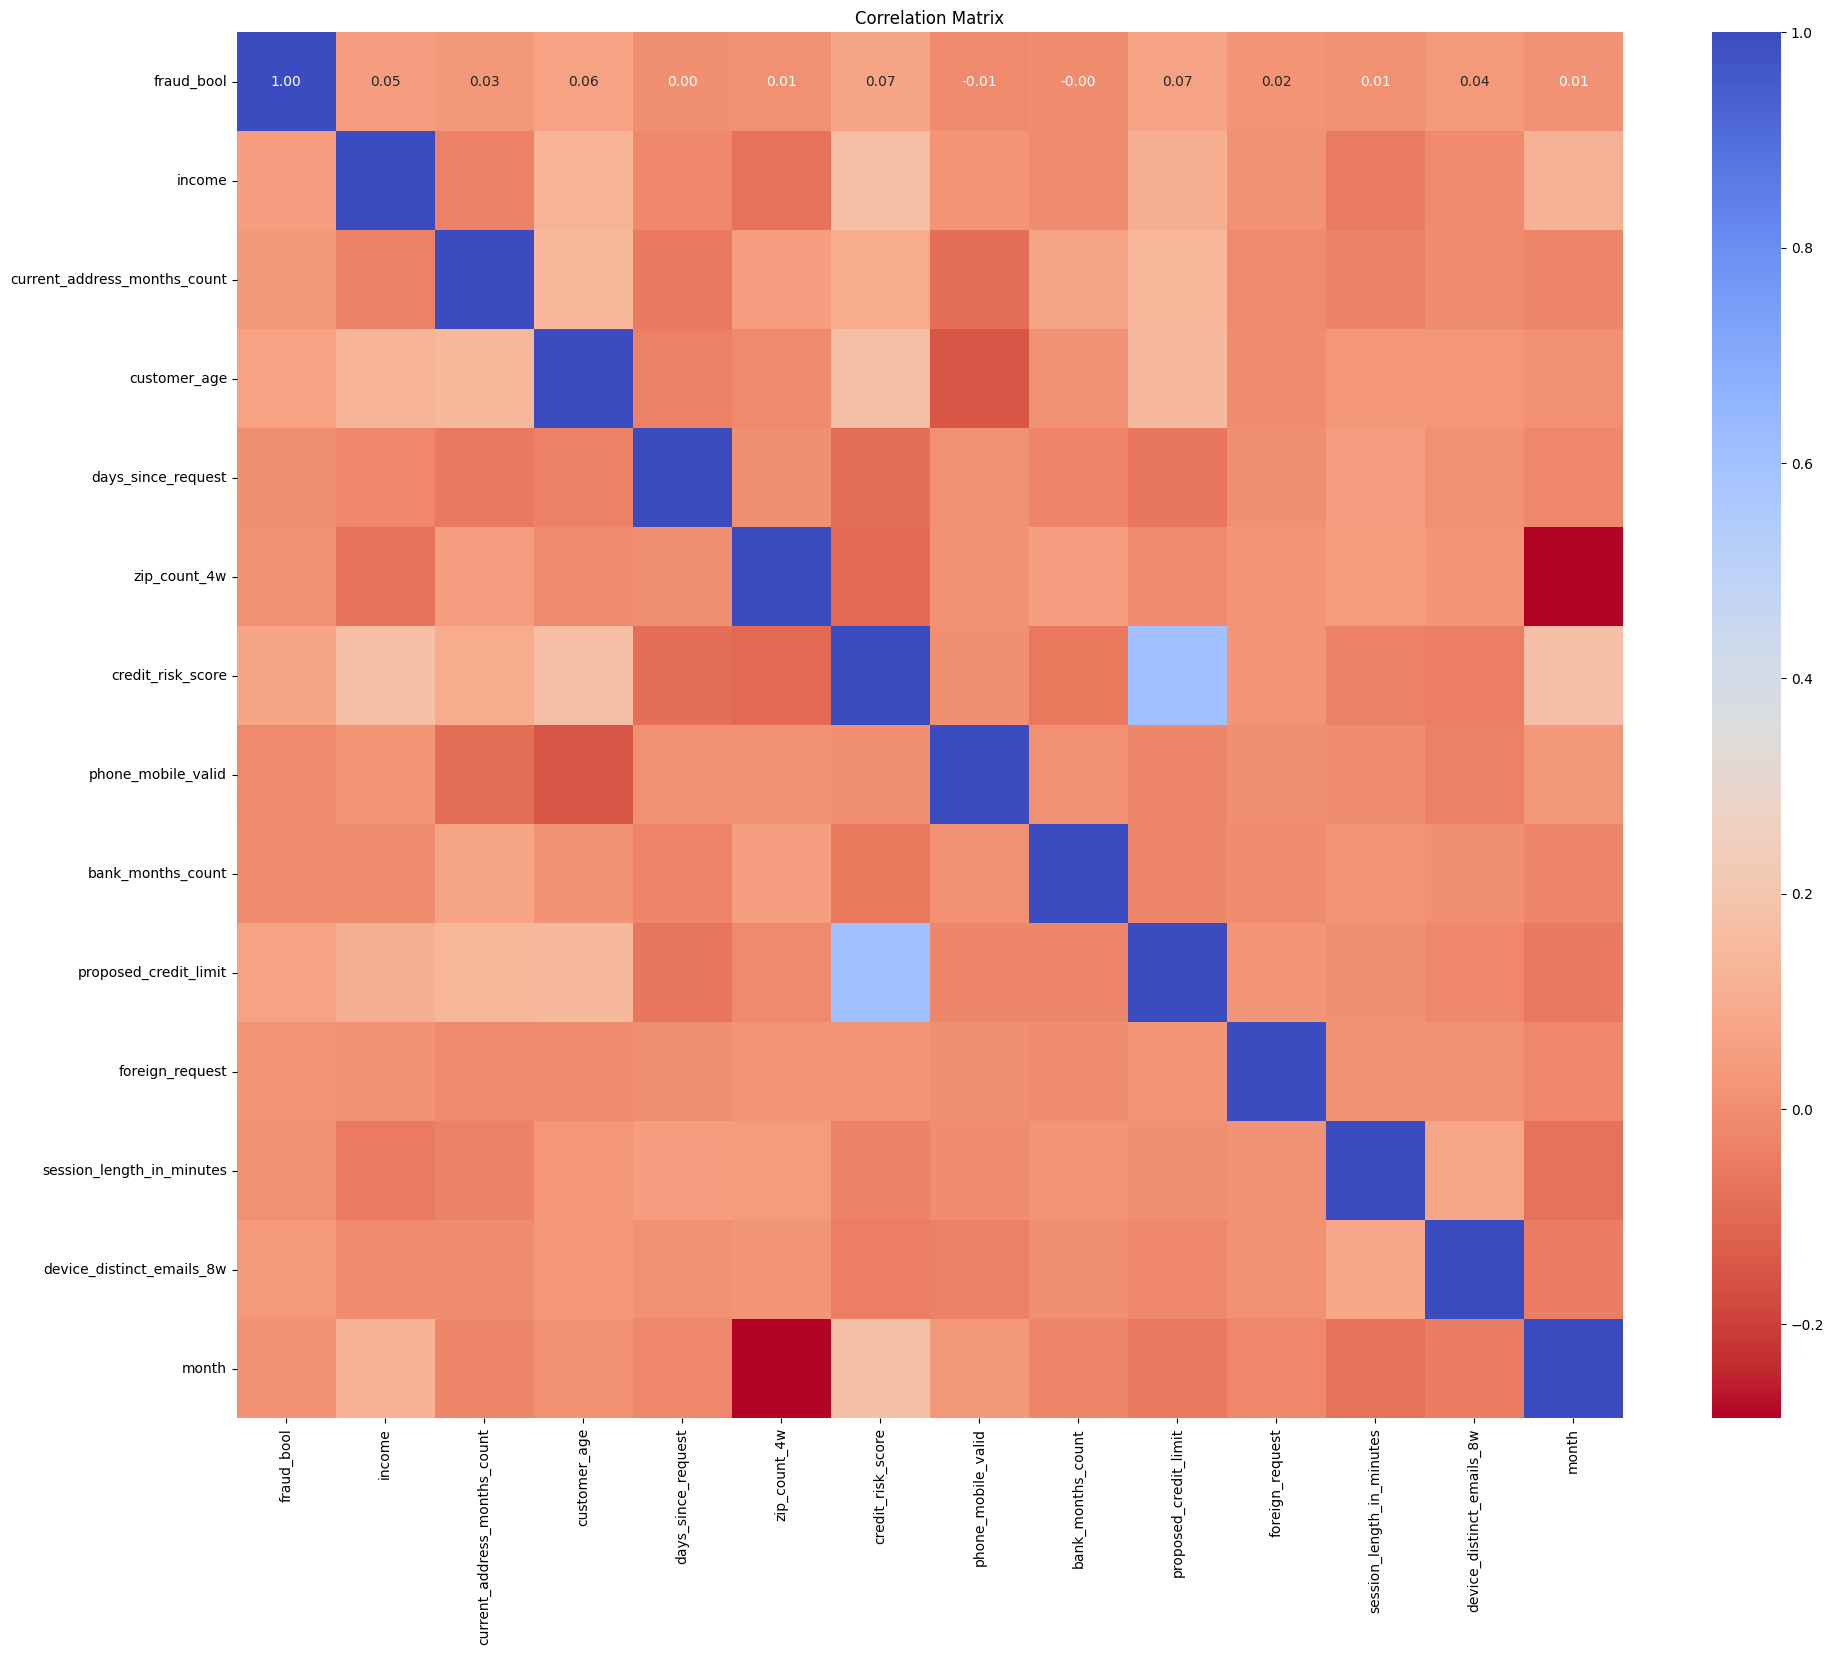

In [75]:
df = df.drop(columns=['name_email_similarity','prev_address_months_count','intended_balcon_amount','velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w','date_of_birth_distinct_emails_4w','email_is_free','phone_home_valid','has_other_cards','keep_alive_session','device_fraud_count'])#删除相关性较低的特征
plt.figure(figsize=(23,18))
correlation_matrix = df.corr()
last_row = correlation_matrix.iloc[-1]
sns.heatmap(correlation_matrix, vmax=1, square=True, cmap="coolwarm_r",annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [76]:
scaler = MinMaxScaler()#归一化
scaler2 = StandardScaler()#z-score标准化

In [77]:
df['bank_months_count'] = scaler.fit_transform(df['bank_months_count'].values.reshape(-1,1))
df['income'] = scaler.fit_transform(df['income'].values.reshape(-1,1))
df['current_address_months_count'] = scaler.fit_transform(df['current_address_months_count'].values.reshape(-1,1))
df['customer_age'] = scaler.fit_transform(df['customer_age'].values.reshape(-1,1))
df['days_since_request'] = scaler.fit_transform(df['days_since_request'].values.reshape(-1,1))
df['zip_count_4w'] = scaler.fit_transform(df['zip_count_4w'].values.reshape(-1,1))
df['credit_risk_score'] = scaler.fit_transform(df['credit_risk_score'].values.reshape(-1,1))
df['proposed_credit_limit'] = scaler.fit_transform(df['proposed_credit_limit'].values.reshape(-1,1))
df['session_length_in_minutes'] = scaler.fit_transform(df['session_length_in_minutes'].values.reshape(-1,1))
df['device_distinct_emails_8w'] = scaler.fit_transform(df['device_distinct_emails_8w'].values.reshape(-1,1))
df['month'] = scaler.fit_transform(df['month'].values.reshape(-1,1))

In [78]:
df.head()

,fraud_bool,income,current_address_months_count,customer_age,days_since_request,zip_count_4w,credit_risk_score,phone_mobile_valid,bank_months_count,proposed_credit_limit,foreign_request,session_length_in_minutes,device_distinct_emails_8w,month
0,0,0.250,0.060606,0.375,0.000086,0.157934,0.595707,1,0.303030,0.685864,0,0.198216,0.666667,0.0
1,0,0.875,0.209790,0.125,0.000129,0.247350,0.579606,1,0.090909,0.685864,0,0.050217,0.666667,0.0
2,0,0.875,0.034965,0.375,0.000157,0.163308,0.463327,1,0.939394,0.005236,0,0.273082,0.666667,0.0
3,0,0.625,0.034965,0.250,0.000089,0.519779,0.465116,1,0.060606,0.005236,0,0.186605,0.666667,0.0
4,0,1.000,0.069930,0.375,0.073195,0.349007,0.466905,1,0.818182,0.005236,0,0.054581,0.666667,0.0


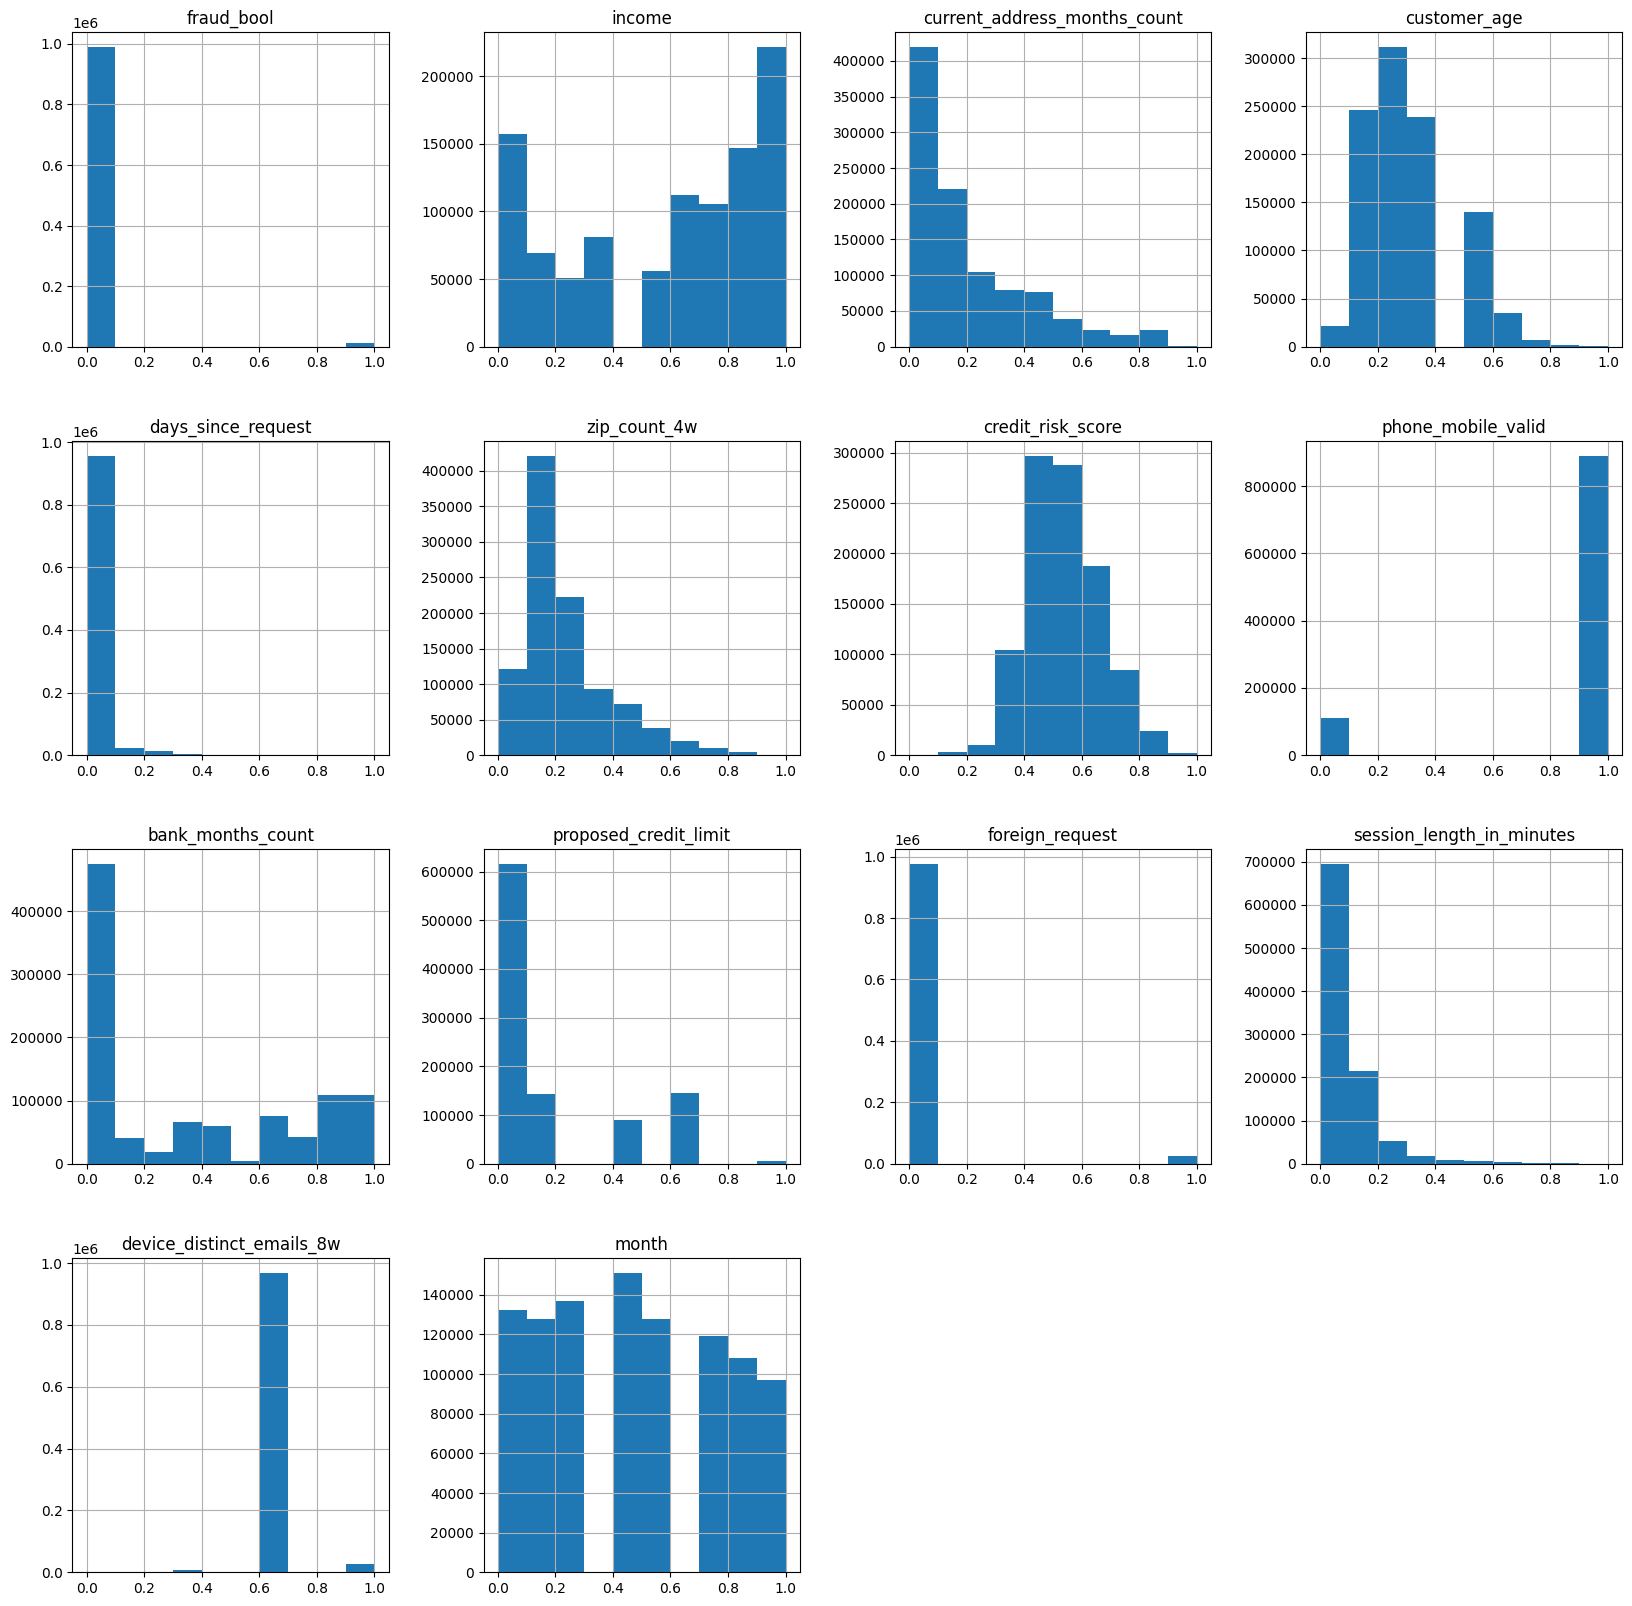

In [79]:
df.hist(figsize=(20,20))
plt.show()

In [81]:
# df.to_csv('Base_cleaned.csv', index=False)#保存清洗后的数据
df_minority = df[df['fraud_bool'] == 1]
df_minority.to_csv('Base_cleaned_minority.csv', index=False)#保存欺诈数据